In [1]:
import pandas as pd
import numpy as np
from collect_responses import _munge

df = _munge("io/next-fig3.json.zip")
df = df.sort_values(by="timestamp")
# df.index = df.timestamp
df.head()

,puid,head,left,right,winner,alg,timestamp,response_time,loser
19443,91c8a984b5f7695ae960275a11c04b_QUNbyNYM2orRoqq...,8,28,18,18,RandomSampling,2015-05-29 03:46:14.384440,1.367,28
19444,91c8a984b5f7695ae960275a11c04b_QUNbyNYM2orRoqq...,0,10,24,10,CrowdKernel,2015-05-29 03:46:16.447802,2.112,24
19445,91c8a984b5f7695ae960275a11c04b_QUNbyNYM2orRoqq...,29,24,20,24,RandomSampling,2015-05-29 03:46:19.310334,1.200,20
19446,91c8a984b5f7695ae960275a11c04b_QUNbyNYM2orRoqq...,26,4,18,18,Test,2015-05-29 03:46:21.220876,1.532,4
19447,91c8a984b5f7695ae960275a11c04b_QUNbyNYM2orRoqq...,17,14,23,14,Test,2015-05-29 03:46:23.405220,1.378,23


1.1431960077301477
0.7801085000000001


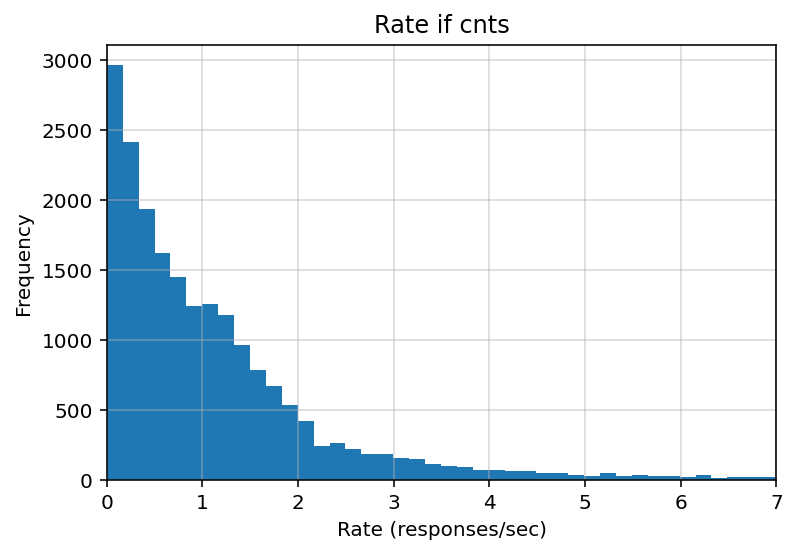

In [2]:
import matplotlib.pyplot as plt
times = df["timestamp"] - df["timestamp"].min()
diffs = times.diff().dt.total_seconds()
diffs = diffs[diffs < 10]

print(diffs.mean())
print(diffs.median())
diffs = diffs[diffs <= 60]
ax = diffs.plot.hist(bins=60)
ax.set_xlim(0, 7)
ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.set_xlabel("Rate (responses/sec)")
ax.set_title("Rate if cnts")
ax.grid(alpha=0.5)

In [3]:
from bokeh.plotting import figure, show
from bokeh.models import (
    ColumnDataSource,
    Grid,
    LinearAxis,
    LogAxis,
    Plot,
    Text,
    ImageURL,
    Legend,
    tickers,
    NumeralTickFormatter,
)
from bokeh.palettes import brewer, d3
from bokeh.embed import json_item


In [4]:
def _make_hist(
    title,
    xlabel,
    hist,
    edges,
    width=600,
    height=200,
    toolbar_location="right",
    **kwargs,
):
    p = figure(
        title=title,
        background_fill_color="#fafafa",
        width=width,
        height=height,
        toolbar_location=toolbar_location,
        **kwargs,
    )
    p.quad(
        top=hist,
        bottom=0,
        left=edges[:-1],
        right=edges[1:],
        fill_color="blue",
        line_color="white",
        alpha=0.5,
    )

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = xlabel
    p.yaxis.axis_label = "Probability (empirical)"
    p.yaxis[0].formatter = NumeralTickFormatter(format="0%")
    p.grid.grid_line_color = "white"
    return p

In [5]:
df2 = df.sort_values(by="timestamp")
gaps = df2["timestamp"].diff().dt.total_seconds().to_numpy()

gaps = gaps[~np.isnan(gaps)]
upper = np.percentile(gaps, 99)
gaps = gaps[gaps <= upper]

bins = [i / 4 for i in range(int(np.ceil(upper)) * 4)]
bin_heights, edges = np.histogram(gaps, bins=bins)
bin_heights = bin_heights / bin_heights.sum()


p = figure(
    title="Rate at which responses received",
    background_fill_color="#fafafa",
    width=600,
    height=200,
    toolbar_location="above",
)
p.line(edges, [0] + bin_heights.cumsum().tolist())
p.scatter(edges, [0] + bin_heights.cumsum().tolist())

p.legend.location = "center_right"
p.legend.background_fill_color = "#fefefe"
p.xaxis.axis_label = "R (responses/sec)"
p.yaxis.axis_label = "Prob. rate <= R"
p.yaxis[0].formatter = NumeralTickFormatter(format="0%")
p.grid.grid_line_color = "white"
show(p)

/Users/scott/anaconda3/envs/salmon/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/Users/scott/anaconda3/envs/salmon/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.background_fill_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)


In [6]:
df2 = df.sort_values(by="timestamp")
gaps = df2["timestamp"].diff().dt.total_seconds().to_numpy()
gaps = gaps[~np.isnan(gaps)]
rates = (1 / gaps)
upper = np.percentile(rates, 95)
rates = rates[rates <= upper]
print(upper)

_bins = [[1 * 10**p, 2 * 10 ** p, 5 * 10 ** p] for p in range(-4, 4)]
bins = [b for bins in _bins for b in bins if rates.min() <= b <= rates.max()]
bin_heights, edges = np.histogram(gaps, bins=bins)

p = _make_hist(
    title="Response times",
    xlabel="Rate (responses/sec)",
    hist=bin_heights,
    edges=edges,
    x_axis_type="log",
)
# xaxis = LogAxis(ticker=tickers.FixedTicker(ticks=bins))
# p.add_layout(xaxis, "below")
show(p)

19.299286839626568


/Users/scott/anaconda3/envs/salmon/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.location` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
/Users/scott/anaconda3/envs/salmon/lib/python3.7/site-packages/bokeh/models/plots.py:764: UserWarning: 
You are attempting to set `plot.legend.background_fill_color` on a plot that has zero legends added, this will have no effect.

Before legend properties can be set, you must add a Legend explicitly, or call a glyph method with a legend parameter set.

  warnings.warn(_LEGEND_EMPTY_WARNING % attr)
